In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#numbers classification by CNN

In [85]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

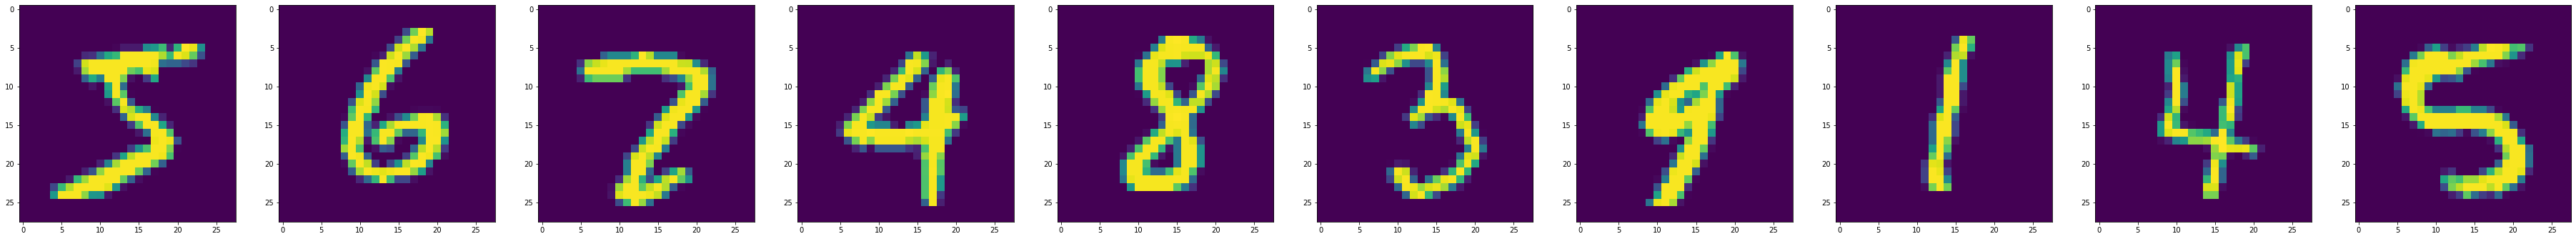

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(64, 32))
digit_idx = 0
for i in range(10):
    ax[i].imshow(x_train[digit_idx])
    digit_idx += 6000

In [80]:
#x_train[0]

In [86]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

In [87]:
#x_train[0]

In [88]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [99]:
model = Sequential()

model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 399s 213ms/step - loss: 0.1674 - accuracy: 0.9481 - val_loss: 0.0528 - val_accuracy: 0.9819
Epoch 2/5
1875/1875 [==============================] - 401s 214ms/step - loss: 0.0673 - accuracy: 0.9808 - val_loss: 0.0249 - val_accuracy: 0.9915
Epoch 3/5
1875/1875 [==============================] - 404s 215ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0224 - val_accuracy: 0.9933E
Epoch 4/5
1875/1875 [==============================] - 413s 221ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0242 - val_accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 459s 245ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0236 - val_accuracy: 0.9919


In [38]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
score = accuracy_score(y_true, pred)
print('Процент ошибок:', np.round((1 - score) * 100, 2), '%')

Процент ошибок: 0.81 %


In [89]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='sigmoid', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='sigmoid'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='sigmoid'),
    layers.Flatten(),
    layers.Dense(64, 'sigmoid'),
    layers.Dense(10, 'softmax')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6209 - accuracy: 0.7980 - val_loss: 0.1173 - val_accuracy: 0.9659
Epoch 2/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0982 - accuracy: 0.9704 - val_loss: 0.0705 - val_accuracy: 0.9768
Epoch 3/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.0555 - val_accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0413 - val_accuracy: 0.9874


In [91]:
pred2 = model2.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
score2 = accuracy_score(y_true2, pred2)
print('Процент ошибок:', np.round((1 - score2) * 100, 2), '%')

Процент ошибок: 1.26 %


In [ ]:
#clothes classification by CNN

In [92]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

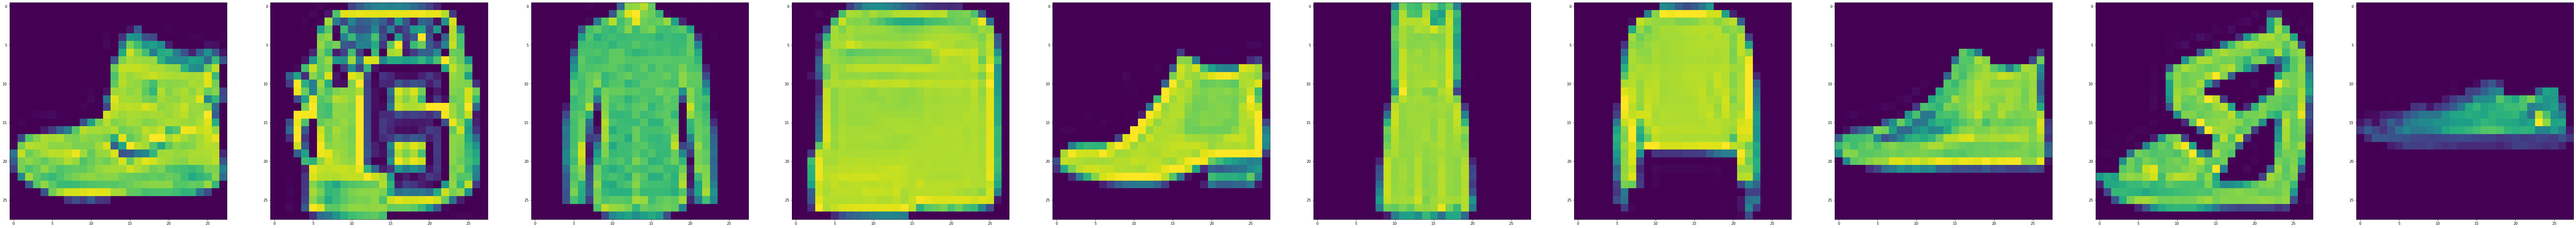

In [93]:
fig, ax = plt.subplots(1, 10, figsize=(128, 64))
digit_idx = 0
for i in range(10):
    ax[i].imshow(x_train[digit_idx])
    digit_idx += 6000

In [94]:
#print(x_train[0])
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)
#print(len(x_train[0]))
#print(x_train[0])

In [95]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
#print(x_train[0])

In [96]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [100]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 382s 204ms/step - loss: 0.5812 - accuracy: 0.8030 - val_loss: 0.3547 - val_accuracy: 0.8700- ETA: 38s - loss
Epoch 2/10
1875/1875 [==============================] - 382s 204ms/step - loss: 0.3849 - accuracy: 0.8594 - val_loss: 0.3223 - val_accuracy: 0.8784
Epoch 3/10
1875/1875 [==============================] - 381s 203ms/step - loss: 0.3542 - accuracy: 0.8710 - val_loss: 0.3070 - val_accuracy: 0.88515 - accuracy: 0.8 - ETA - ETA: 3s - loss: 0.3538 - ac - ETA: 2s - loss: 0.3539 -  - ETA: 0s - loss: 0.3542 - accuracy
Epoch 4/10
1875/1875 [==============================] - 380s 203ms/step - loss: 0.3402 - accuracy: 0.8742 - val_loss: 0.3017 - val_accuracy: 0.8853TA: 51s - loss: 0.3373 - accuracy: 0 - ETA: 50s  - ETA: 44s - - ETA: 29s - loss: 0.3405 - accuracy: 0.873 - ETA: 29s - lo - ETA
Epoch 5/10
1875/1875 [==============================] - 383s 204ms/step - loss: 0.3247 - accuracy: 0.8798 - val_loss: 0.2961 - val_accuracy: 0.8886

In [103]:
pred2 = model.predict(x_test)
pred2 = np.argmax(pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)
score2 = accuracy_score(y_true2, pred2)
print('Процент ошибок:', np.round((1 - score2) * 100, 2), '%')

Процент ошибок: 9.77 %
